# Optimization basics

Optimization is the task of finding minima and maxima of numeric functions
of the form $f:\mathbb{R}^n\mapsto \mathbb{R}$.  This is a key task in many machine learning problems. In general the task has interest 
in the multivariate case, but it is convenient to take introductory examples from the monovariate case, that is with functions of the form
 $f:\mathbb{R}\mapsto \mathbb{R}$. 

Optimization methods are well behaved for the convex case, that is the case where the function is "bowl shaped" and where the function has a unique global minimum. This is the case we essentially focus on  here. 
The non convex case is important too but more tricky to work with since many local solutions may exist. This latter case is of practical importance when optimizing functions like neural networks.

## Linear regression and least squares

Linear regression is a common tool for data analysis and an excellent introduction to machine learning. 
However it is not straightforwardly applicable for modeling natural language directly. Suppose we have a data set such as the Iris flowers,
whose first few lines are given here:

|        | Sepal Length | Sepal Width |  Petal Length | Petal Width |
| --- |         ---       |       ---       |         ---        |    ---         |
|    1  |           5.1      |        3.5       |          1.4        |      0.2        |
|    2  |         4.9        |        3.0       |          1.4        |      0.2        |
|    3  |         4.7        |        3.2       |           1.3       |      0.2        |
|    4  |          4.6       |        3.1       |           1.5       |      0.2        |

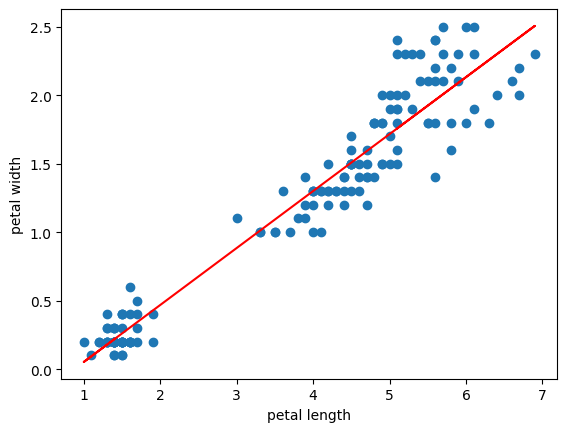

In [1]:
from myst_nb import glue

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fig,axes = plt.subplots() 

iris = datasets.load_iris()
iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_plot = axes.scatter(iris['petal length (cm)'], iris['petal width (cm)'])
a, b = np.polyfit(iris['petal length (cm)'], iris['petal width (cm)'], 1)
axes.plot(iris['petal length (cm)'], a*iris['petal length (cm)']+b,color="red")
axes.set_xlabel('petal length')
axes.set_ylabel('petal width')
glue("iris-plot",fig,display=False)

**Bivariate least squares** Given two variables we can plot their relation with a scatter plot, for instance we can plot the petal width as a function of the petal length:

{glue:any}`iris-plot`

and we may summarize the graphical pattern with a regression line, given here in red. 
This kind of summary has many applications in data analysis and is called **linear regression**.

How is this regression line actually computed ? Let a bivariate regression dataset be ${\cal D} = (x_{1}, y_{1}) \ldots (x_{n}, y_{n})$
and a regression line be a linear function of the form 

$$
\hat{y} = ax + b
$$

we can measure the distance between each observed datapoint $(x_i,y_i)$ and the corresponding $\hat{y}_i$ on the regression line with a squared difference 
$(y_i - \hat{y}_i)^2$. If we sum all these pointwise distances we get the sum of squares loss for dataset ${\cal D}$:

$$
\begin{align}
\text{ssq}_{\cal D}(a,b) &=  \sum_{i=1}^n (\hat{y}_i - y_i)^2 \\
&=  \sum_{i=1}^n (ax_i + b  - y_i)^2 
\end{align}
$$

for computing a regression line, we seek the line equation that minimizes the sum of squares loss: that is we seek the values of the variables $a$ and $b$
that make the loss minimal. In formal notation we write:

$$
(\hat{a},\hat{b}) = \mathop{\text{argmin}}_{(a,b)\in \mathbb{R}^2} \sum_{i=1}^n (ax_i + b  - y_i)^2 
$$

to write that in order to estimate the values $(\hat{a},\hat{b})$ we have to solve the minimization problem of the function $ \sum_{i=1}^n (ax_i + b  - y_i)^2  $with 
variables $(a,b)$. In the statistical vocabulary we also say that the estimation of the regression line parameters is solved by the **least squares method**.

**Multivariate least squares** Note that least squares can be generalized to cases with multiple predictors. In this latter case the dataset has the form ${\cal D} = (x_1, x_2\ldots x_k , y)$
and we predict $y$ given a vector of $x_i$. In this generalized case the linear function takes
the form:

$$
\hat{y} = a_1 x_{1} + a_2 x_2 + \ldots + a_k x_k + b
$$

the sum of squares and the minimization problem remain essentially the same. For instance the sum of square becomes:

$$
\text{ssq}_{\cal D}(\mathbf{a},b) = \sum_{i=1}^n (a_1x_{1,i}+\ldots + a_k x_{k,i}+ b - y_i)^2 
$$

**Loss function in machine learning** It turns out that linear regression is a simple instance of statistical model whose parameters $\mathbf{a}$ and $b$ are found by solving a minimization problem. 
This kind of methodology, estimating parameters by solving a minimization problem, is common to the vast majority of machine learning methods used today. The function to minimize
is not always the least squares, each model has its own function,  and in machine learning terminology this function is called the **loss function**.

```{admonition} Linear regression without pain
:class: tip
Linear regression estimation is a routine task in applied statistics. In python we can do that easily with, for instance, the `numpy.linalg` package
and the `lstsq` function.
```

In [2]:
import pandas as pa
import numpy as np
from sklearn import datasets
from numpy.linalg import lstsq

iris = datasets.load_iris()
iris = pa.DataFrame(data=iris.data, columns=iris.feature_names)

X = iris['petal length (cm)']
X = np.vstack([X, np.ones(len(X))]).T #adds the intercept
Y = iris['petal width (cm)']
a,b = lstsq(X,Y,rcond=None)[0]
print(a,b)

0.4157554163524115 -0.363075521319029


More elaborate natural language processing and machine learning problems, however, cannot be implemented by simple library calls, 
hence we provide a more detailed introduction to optimization methods.

## Convex optimization of univariate functions

Optimization methods seek to find the unique minimum of functions, and in the monovariate case functions have the form $f:\mathbb{R}\mapsto \mathbb{R}$.
Not all such functions have a unique minimum. We thus focus on a subset of functions that have this property: the strictly *convex functions*.

Informally speaking, convex functions have the following properties :

 - convex functions are continuous and one can draw them on a paper without raising up the pen
 - convex functions are convex (!) that is one can choose any couple of points on the function graph and draw a straight line between the two such that this line will be above the function graph.
 - when the function is strictly convex, its critical point is unique and is a global minimum of the function.
 - convex function are not necessarily differentiable. For instance, the absolute value and the maximum function are convex but not everywhere differentiable.

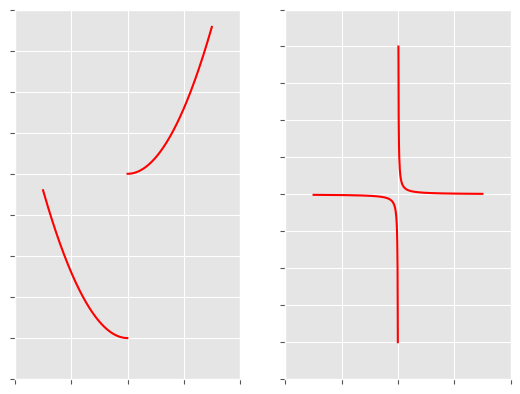

In [3]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig,axes = plt.subplots(ncols=2)
x    = np.arange(-3,3,0.01)
f1x  = 0.1*x**2
f2x  = 0.1*x**2+1
axes[0].plot(x[:300],f1x[:300],color="red")
axes[0].plot(x[300:],f2x[300:],color="red")

axes[0].set_xticks(axes[0].get_xticks(),labels="")
axes[0].set_yticks(axes[0].get_yticks(),labels="")


x1    = np.arange(-3,0.0,0.01)
x2    = np.arange(0.01,3,0.01)

ix1,ix2  = 1./x1,1./x2
axes[1].plot(x1,ix1,color="red")
axes[1].plot(x2,ix2,color="red")

axes[1].set_xticks(axes[1].get_xticks(),labels="")
axes[1].set_yticks(axes[1].get_yticks(),labels="")


glue("discontinuous",fig,display=False)

```{admonition} Continuity and discontinuity

Here is an example of two discontinuous functions. As can be seen the two functions exhibit a "jump" that would require to raise up the pen
to draw the graph.

{glue:}`discontinuous`

Technically, a function $f$ is continous at $a$ iff :

$$
\lim_{x\rightarrow a} f(x) = f(a) 
$$

and $f$ is **continuous** on the interval $S$ if $f$ is continuous for every $a\in S$. 
Otherwise $f$ is **discontinuous** on the interval $S$. Discontinuity at $a$ arises when the limit at $a$ does not exist.
On both examples, at 0, the left limit is different from the right limit.
```` 
 
### Convexity

Optimizing a strictly convex function, amounts to find its unique minimum. 
Informally, a strictly convex function is a continuous U-shaped function with a unique minimum.

In the univariate case, the definition formalizes the intuition that a line from a couple of points $x_1$
and $x_2$ is above (or equal) the function $f$. Let $t \in [0,1]$ then $ f(t x_1 + (1-t) x_2)$ is the set of
values for the function $f$ between $x_1$ and $x_2$ and $t f(x_1) + (1-t) f(x_2)$ is the set of values on the line on the same interval.
In this context, a convex function verifies:

$$
f(t x_1 + (1-t) x_2) \leq t f(x_1) + (1-t) f(x_2) \qquad t \in [0,1] 
$$

as can be better understood with the following illustration:

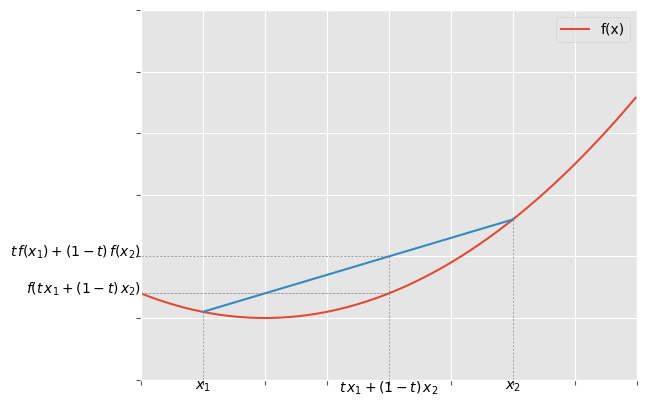

In [4]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
x    = np.arange(-1,3,0.01)
fx   = (x**2)/5

x1  = [-0.5,(0.5**2)/5]
x2  = [2,(2**2)/5]  
p1  = axes.plot(x,fx,label="f(x)")
p2  = axes.plot([-0.5,2],[(0.5**2)/5,(2**2)/5])
t1  = axes.text(x1[0],-0.5,"$x_1$",verticalalignment="top", horizontalalignment="center")
t2  = axes.text(x2[0],-0.5,"$x_2$",verticalalignment="top", horizontalalignment="center")
t3 = axes.text(1,-0.5,"$t \, x_1 + (1-t)  \, x_2 $", verticalalignment="top",horizontalalignment="center")

p = axes.plot([x1[0], x1[0]],[-0.5,x1[1]],'--',color="gray", linewidth=0.5)
p = axes.plot([x2[0], x2[0]],[-0.5,x2[1]],'--',color="gray", linewidth=0.5)


lgd = axes.legend()


yline = ((0.5**2) * (1/5) * (2/5)) + ((3/5) * (1/5) * (2**2))
p = axes.plot([1,1],[-0.5,yline],'--',color="gray", linewidth=0.5)
p = axes.plot([-1,1],[1/5,1/5],'--',color="gray",linewidth=0.5)
p = axes.plot([-1,1],[yline,yline],'--',color="gray",linewidth=0.5)

t = axes.text(-1,1/5,"$f(t\, x_1 + (1-t) \, x_2)$", horizontalalignment="right")
t = axes.text(-1,yline,"$t\, f(x_1) + (1-t) \, f(x_2)$", horizontalalignment="right")

axes.set_xlim(-1,3)
axes.set_ylim(-0.25,2.5)

axes.set_xticks(axes.get_xticks(),labels="")
axes.set_yticks(axes.get_yticks(),labels="")
axes.grid(True)

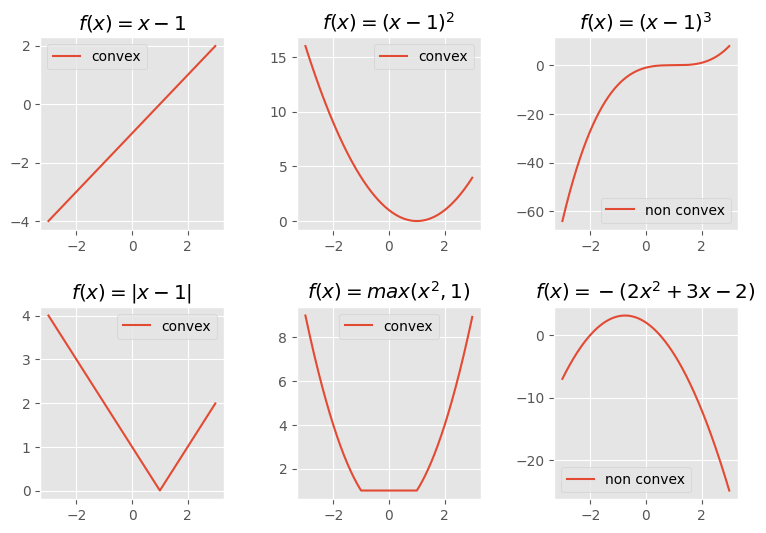

In [5]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(9,6),gridspec_kw={'hspace': 0.4, 'wspace': 0.4})

x = np.arange(-3,3,0.01)

axes[0,1].plot(x,(x-1)**2,label="convex")
axes[0,1].set_title("$f(x)=(x-1)^2$")
axes[0,1].legend()


axes[0,2].plot(x,(x-1)**3, label="non convex")
axes[0,2].set_title("$f(x)=(x-1)^3$")
axes[0,2].legend()


axes[0,0].plot(x,x-1,label="convex")
axes[0,0].set_title("$f(x)= x-1$")
axes[0,0].legend()


axes[1,0].plot(x,np.abs(x-1),label="convex")
axes[1,0].set_title("$f(x)= | x-1 |$")
axes[1,0].legend()


axes[1,1].plot(x,np.maximum(x**2,1),label="convex")
axes[1,1].set_title("$f(x)= max(x^2, 1)$")
axes[1,1].legend()


axes[1,2].plot(x,-(2*x**2+3*x-2),label="non convex")
axes[1,2].set_title("$f(x)=-(2x^2+3x-2)$")
axes[1,2].legend()

glue("convexity_plot",fig,display=False)

```{admonition} Example (convexity)

Here are a few examples of convex and non convex functions.
Observe that linear functions like $f(x) = x - 1$ are convex and that convex functions can have several minima,
for instance $f(x) = \text{max}(x^2,1)$ has an infinite set of minimal values $x$ for $f(x) = 1$. One can finally observe that 
$- f(x)$ is **concave** if $f(x)$ is convex as illustrated with $f(x) = -(2x^2+3x-2)$

{glue:any}`convexity_plot`

```

To rule out linear functions like $x-1$ or functions with a set of minimal values like $\text{max}(x^2,1)$ we define a more constrained version of convexity.
A function $f$ is **strictly convex** iff:

$$
f(t x_1 + (1-t) x_2) < t f(x_1) + (1-t) f(x_2) \qquad t \in [0,1] 
$$

A strictly convex function on interval $S$ has a single minimal value, or more precisely $\text{argmax}_{x\in S} f(x)$ has a unique solution when $f(x)$ is strictly convex.

### Pointwise derivative

To find the minimum of a function $f$ we fundamentally rely on a quantity, the pointwise derivative, that essentially says how the function evolves at some chosen point.
When the derivative is null for some point $x_t$, it means that $f(x)$ is constant around this point.
If the function is strictly convex, a null derivative for some value $x_t$ indicates that the minimum of $f$ is $x_t$.

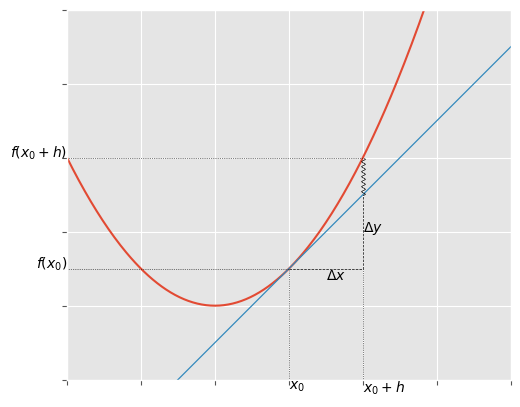

In [6]:
from myst_nb import glue

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
x    = np.arange(-2,2.5,0.01)
fx   = (x+1)**2
line = (x+0.5)+0.25
axes.plot(x,fx,label="$f(x)=(x+1)^2$")
axes.plot(x,line,linewidth=0.9)
axes.plot([-0.5,-0.5],[-1,0.25],":",color="black",linewidth = 0.5)
axes.plot([-2,-0.5],[0.25,0.25],":",color="black",linewidth = 0.5)
axes.plot([-0.5,-0.0],[0.25,0.25],"--",color="black",linewidth = 0.5)
axes.plot([0,0.0],[0.25,0.75],"--",color="black",linewidth = 0.5)

with matplotlib.rc_context({'path.sketch': (2, 5, 1)}):
    axes.plot([0,0],[0.75,1.0], color = 'black', linewidth=0.5)
axes.plot([-2,0.0],[1.0,1.0],":",color="black",linewidth = 0.5)
axes.plot([0.0,0.0],[-0.5,0.25],":",color="black",linewidth = 0.5)


axes.text(-0.5,-0.5,"$x_0$",verticalalignment="top")
axes.text(-0.0,-0.5,"$x_0+h$",verticalalignment="top")
axes.text(-2,0.25,"$f(x_0)$",horizontalalignment="right")
axes.text(-2,1.0,"$f(x_0+h)$",horizontalalignment="right")

axes.text(-0.25,0.25,"$\Delta x$",verticalalignment="top")
axes.text(0.,0.5,"$\Delta y$",horizontalalignment="left")


axes.set_ylim((-0.5,2))
axes.set_xlim((-2,1))
axes.set_xticks(axes.get_xticks(),labels="")
axes.set_yticks(axes.get_yticks(),labels="")
axes.grid(True)

axes.set_aspect('equal')

glue("differential",fig,display=False)

```{admonition} The linear approximation

Derivatives approximate the rate of change of a function by a straight line. 
For a point $(x_t,f(x_t))$ we measure the slope of this function by measuring the ratio
$\Delta y = f(x_0+ h) - f(x_0)$, that is the vertical change as a function of the horizontal change 
$\Delta x = (x_0 + h) - x_0$ where $h > 0$ is a non null positive number.

{glue:any}`differential`

The rate of change at $x_0$ is measured by the ratio:

$$
\frac{\Delta y}{\Delta x}(x_0) = \frac{f(x_0+ h) - f(x_0)}{ (x_0 + h) - x_0}
$$

The problem with this first approximation comes from the fact that the larger the $h$ the larger the approximation.
To avoid unjustified approximations, we should choose $h$ as close to 0 as possible. That is the motivations for using derivatives.
````

A derivative crucially defines $h$ to be infinitesimal (or infinitely close to 0).
This leads to the definition of the **pointwise derivative** of the function $f$ at $x_0$ as the limit:  

$$
\frac{d y}{d x}(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h )-f(x_0)}{(x_0+h)-x_0}
$$

where $dy$ and $dy$ implicitly denote respectively the infinitesimal vertical and horizontal differences of the function.
To make explicit that we compute the derivative of the function $f$ at $x_0$ we rather write:

$$
\frac{d f}{d x}(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h )-f(x_0)}{(x_0+h)-x_0}
$$

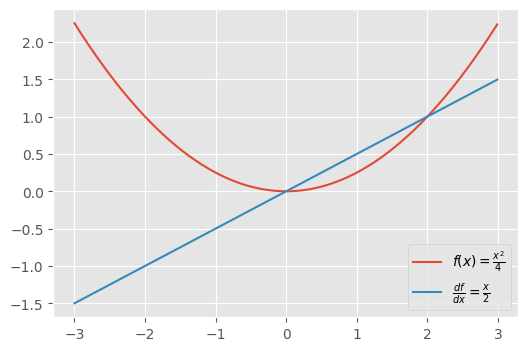

In [7]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
derivative_fig,axes = plt.subplots(figsize=(6,4))
x   = np.arange(-3,3,0.01)
fx  = 0.25*x**2
fpx = 0.5*x 

axes.plot(x,fx,label=r"$f(x)=\frac{x^2}{4}$")
axes.plot(x,fpx,label=r"$\frac{d f}{d x} = \frac{x}{2}$")
lgd = axes.legend()
glue("deriv_fig",derivative_fig,display=False)

```{admonition} Example

We compute the pointwise derivative of the function $f:x\mapsto \frac{x^2}{4}$ at $x_0=1$:

$$
\begin{align*}
 \frac{d y}{d x}(x_0)&=\lim_{h\rightarrow 0}   \frac{\frac{(x_{0}+h)^2}{4} -  \frac{x_0^2}{4}}{(x_0+h)-x_0}\\
 &=\lim_{h\rightarrow 0}  \frac{1}{4} \frac{(x_{0}+h)^2 -  x_0^2}{(x_0+h)-x_0}\\
   &= \lim_{h\rightarrow 0} \frac{1}{4}\frac{ [(x_0+h)+x_0] [(x_{0}+h)-x_0]}{(x_{0}+h)-x_0}\\
  &= \lim_{h\rightarrow 0} \frac{1}{4} (x_{0}+h+x_0)\\
  &= \frac{1}{4} (x_{0} + x_0)\\
  &=\frac{1}{2}
\end{align*} 
$$

Now if we want to compute the derivative of the function $f:x\mapsto \frac{x^2}{4}$ at $x_0=4$ we redo almost everything:

$$
\begin{align*}
 \frac{d y}{d x}(x_0)&=\lim_{h\rightarrow 0}   \frac{\frac{(x_{0}+h)^2}{4} -  \frac{x_0^2}{4}}{(x_0+h)-x_0}\\
 &=\lim_{h\rightarrow 0}  \frac{1}{4} \frac{(x_{0}+h)^2 -  x_0^2}{(x_0+h)-x_0}\\
   &= \lim_{h\rightarrow 0} \frac{1}{4}\frac{ [(x_0+h)+x_0] [(x_{0}+h)-x_0]}{(x_{0}+h)-x_0}\\
  &= \lim_{h\rightarrow 0} \frac{1}{4} (x_{0}+h+x_0)\\
  &= \frac{1}{4} (x_{0} + x_0)\\
  &= 2
\end{align*} 
$$

One can observe however that these derivatives could be computed more easily for every $x$ by using the function $\frac{d f}{d x}=\frac{2 x}{4}$. 
This function,  $\frac{d f}{d x}$, is called the **derivative function** of $f$. {glue:any}`deriv_fig`
```

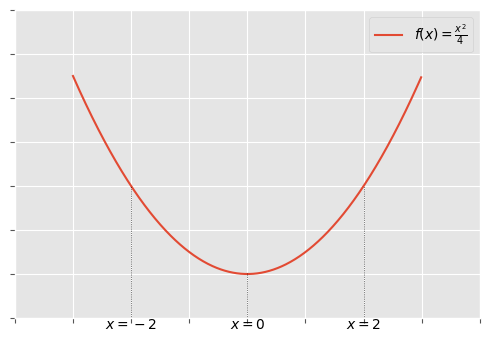

In [8]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
derivative_fig,axes = plt.subplots(figsize=(6,4))
x   = np.arange(-3,3,0.01)
fx  = 0.25*x**2

axes.plot(x,fx,label=r"$f(x)=\frac{x^2}{4}$")
axes.text(-2,-0.5,"$x = -2$",verticalalignment="top",horizontalalignment="center")
axes.text(0, -0.5,"$x = 0$",verticalalignment="top",horizontalalignment="center")
axes.text(2, -0.5,"$x = 2$",verticalalignment="top",horizontalalignment="center")

axes.plot([0.0,0.0],[-0.5,0.01],":",color="black",linewidth = 0.5)
axes.plot([-2.0,-2.0],[-0.5,1],":",color="black",linewidth = 0.5)
axes.plot([2.0,2.0],[-0.5,1],":",color="black",linewidth = 0.5)
axes.set_ylim(-0.5,3)

axes.set_xticks(axes.get_xticks(),labels="")
axes.set_yticks(axes.get_yticks(),labels="")
axes.grid(True)
lgd = axes.legend()
glue("deriv_interpret",derivative_fig,display=False)

```{admonition} Interpretation of the pointwise derivative

The derivative provides a crucial indicator for optimization purposes. It indicates whether the function increases, decreases or remains stable at point $x_0$:

- the derivative is positive when the function increases at $x_0$
- the derivative is negative when the function decreases at $x_0$
- the derivative is zero when the function is constant at $x_0$ 

We illustrate this property in the picture below for 3 values of $x$ on the same function $f(x) = \frac{x^2}{4}$.
Each time we provide the tangent function. We can observe at $x = -2$ that the function decreases and that the derivative $\frac{d f}{d x}(-2)= -1$,
at $x = 2$ that the function increases and that the derivative $\frac{d f}{d x}(2)= 1$ and at $x = 0$ that the function is constant (has a minimum)
and that the  derivative $\frac{d f}{d x}(0)= 0$,

{glue:any}`deriv_interpret`

```

### The derivative function

For a function $f$, its derivative function is the function $\frac{f y}{d x}$. It turns out that one can find the derivative function
from the a analytical form of the function $f$ by using a small set of functional rewriting rules.

|   Source                                        |   Result                                 |  Comment                         |
|:-------------------------- |------------------------ | -------------------:|
| $\frac{d x}{d x}$                           | $1$                                        |                                       |
| $\frac{d c}{d x}$                           | $0$                                        |   $c$ is a constant           |
| $\frac{d \lambda f(x)}{d x}$         | $\lambda \frac{d f(x)}{d x}$   |  $\lambda$ is a constant |
| $\frac{d f(x)  +  g(x) }{d x}$         | $ \frac{d f(x)}{d x} + \frac{d g(x)}{d x} $   |                         |
| $\frac{d f(x) \times   g(x) }{d x}$         | $ \frac{d f(x)}{d x} g(x) + f(x) \frac{d g(x)}{d x} $   |                         |
| $\frac{d \frac{f(x)} {g(x)} }{d x}$         | $\frac{ \frac{d f(x)}{d x} g(x) - f(x) \frac{d g(x)}{d x} } {g(x)^2}$   |                         |
| $\frac{d f(x)^n}{d x}$                           | $n f(x)^{n-1} \frac{d f(x)}{dx} $    |           |
| $\frac{d \frac{1}{f(x)}}{d x}$                | $-\frac{1}{f(x)^2}\frac{d f(x)}{dx}$    |           |
| $\frac{d \sqrt{f(x)}}{d x}$                | $\frac{1}{2\sqrt{f(x)}}\frac{d f(x)}{d x}$   |           |
|  $\frac{d e^{f(x)}}{d x}$          | $ e^{f(x)} \frac{d f(x)}{d x} $ |  $e$ is the exponential function        |
| $\frac{d \ln (f(x))}{d x}$    |  $\frac{1}{f(x)}\frac{d f(x)}{d x} $ | $\ln$ is the natural logarithm function |

```{admonition} Example (manual computation)
Here is how to compute the derivative of $f(x) = \frac{x^2}{4}$ with the rewriting rules:

$$
\begin{align}
\frac{d \frac{1}{4} x^2}{dx} &= \frac{1}{4} \frac{d x^2}{dx}\\
                             &= \frac{1}{4} 2 x \frac{d x}{x}\\
							 &=  \frac{1}{2} x
\end{align}
$$

we conclude that $\frac{d f}{d x} = \frac{1}{2} x $
```

```{admonition} Example (symbolic computation)
Note that the computation of derivative function can be made easy with symbolic computation libraries.
In Python the `sympy` library computes derivatives. Here is an example for computing the derivative of
$f(x) = \frac{x^2}{4}$:
```

In [9]:
from sympy import symbols,diff

x          = symbols('x')     #declares 'x' as a symbol
derivative = diff(x**2 / 4,x) #computes the derivative function wrt to 'x'
print(derivative)

x/2


```{admonition} Note 
Where do the the rules come from ? Actually they can be derived from the definition of the derivative. 
Here is an example for the addition rule. We simply instanciate the definition for the addition of $f(x)+g(x)$ 
and do the development:

$$
\begin{align}
    \frac{d f(x_0) + g (x_0)}{dx}(x) &= \lim_{h \rightarrow 0}\frac{f(x_0+h)+g(x_0+h)-(f(x_0)+g(x_0))}{(x_0+h)-x_0}\\
	                &=\lim_{h \rightarrow 0}\frac{f(x_0+h) - f(x_0)+g(x_0+h)-g(x_0)}{(x_0+h)-x_0}\\
				    &=\lim_{h \rightarrow 0}\frac{f(x_0+h)- f(x_0)}{(x_{0}+h)-x_0} +\lim_{h \rightarrow 0}\frac{g(x_0+h) - g(x_0)}{(x_{0}+h)-x_0}\\
    &= \frac{d f(x)}{d x}(x) + \frac{d g(x)}{d x}(x)
  \end{align}
$$

```

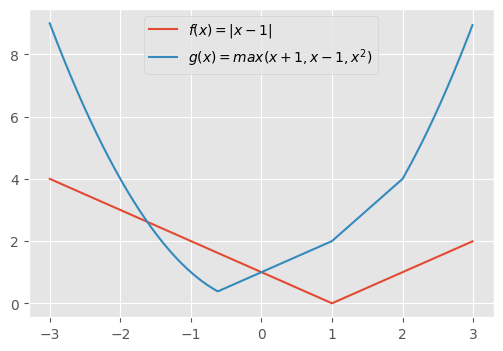

In [10]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(6,4))
x   = np.arange(-3,3,0.01)
fx  = np.abs(x-1)
gx  = np.maximum(np.maximum(x+1,2*x),x**2) 

axes.plot(x,fx,label=r"$f(x)= |x-1| $")
axes.plot(x,gx,label=r"$g(x)= max(x+1,x-1,x^2)$")
lgd = axes.legend()
glue("nondiff",fig,display=False)

```{admonition} Note (differentiability)

The derivative function defined on the interval $I$ supposes the function $f$ to be everywhere differentiable over $I$.
Not all functions are everywhere differentiable. Non continuous functions are obviously non differentiable
but there are however continuous functions that are not differentiable.

Below are typical example functions that are continuous but non differentiable everywhere: a maximum function and a absolute value function.
Both functions have angular points that are non differentiable. 
For $x = 1$ the absolute value function $|x-1|$ has a derivative $-1$ when we approach $x$ by the left
while it has derivative $1$ when we approach $x$ by the right. 

{glue}`nondiff`

More generally, a function is **differentiable at $x$** if its right derivative equals its left derivative, that is:

$$
\lim_{h \rightarrow 0^+} \frac{f(x_0+h) - f(x_0)}{(x_0+h) - x_0} = \lim_{h \rightarrow 0^-} \frac{f(x_0+h) - f(x_0)}{(x_0+h) - x_0}
$$

```

### Analytical root finding method

Finding the minimum of a function $f$ over an interval $S$ amounts to solve:

$$
x = \mathop{\text{argmin}}_{x \in S} f(x)
$$

and for strictly convex functions, the minimum is guaranteed to be unique. Thus we are guaranteed that setting the derivative to 0 and solving $\frac{df}{dx}(x) = 0$
has a unique solution, the minimum. In other words optimization of a convex function can be cast as finding the root (or zero) of the derivative function.

```{admonition} Example
To find the minimum of the convex function $f(x) = (x - 4)^2$ we 
first compute its derivative:

$$
\begin{align}
\frac{df}{dx} &= 2(x-4)\\
             &= 2x - 8
\end{align}
$$

Once the derivative is known we solve the equation:

$$
\begin{align}
 2x - 8 &= 0\\
 2x &= 8\\
 x &= 4
\end{align}
$$

and we conclude that $ 4 = \mathop{\text{argmin}}_{x \in \mathbb{R}} (x-4)^2$ .

```

### Numerical root  finding methods

The analytical method becomes impractical for non linear functions, like higher order polynoms, and in the multivariate case.
We present here a family of numerical methods for root finding and for functional minimization of convex functions that work generally well both for linear and non linear functions.

All of theses methods share the same abstract algorithm. They build a sequence of approximate solutions (or iterates) $x_1 x_2 \ldots x_n$ starting from an initial random guess $x_1$
and refining the solution at each step $x_t$ by taking advantage of  information given by the derivative at $x_t$.

**Gradient method**  Given an iterate $x_t$, the gradient descent generates $x_{t+1}$ by evaluating $\frac{df}{dx}(x_t)$. There are 3 cases:

-  $\frac{df}{dx}(x_t)$ is positive. Then the minimum is smaller than $x_t$ and $x_{t+1} < x_t$ 
-  $\frac{df}{dx}(x_t)$ is negative. Then the minimum is greater than $x_t$ and $x_{t+1} > x_t$ 
- $\frac{df}{dx}(x_t)$  is zero. Then the solution is found

These three cases are wrapped up in the update central to  {prf:ref}`gd-algo`. Notice that when the derivative is positive we get $x_{t+1}$ by substracting the full derivative value to $x_t$
and when the derivative is negative we get $x_{t+1}$ by adding the full derivative value to $x_t$. The $\alpha$ parameter, the **learning rate** ($\alpha > 0$), is a value used to scale the gradient update and $\epsilon$
is a **tolerance** parameter usually set to a small positive value to control for the approximation of the returned solution.

```{prf:algorithm} Gradient descent
:label: gd-algo

**while** $ | x_{t+1} - x_t |  > \epsilon $ **do**
- $x_{t+1} \gets x_t - \alpha\frac{df}{dx}(x_t)$

```

Although simple, the gradient descent algorithm suffers from several drawbacks. Generally speaking it offers few guarantees to reach a solution with a good enough precision in a finite amount of time. 
In practice it can overshoot: if the learning rate is too high the updates may be too strong and the algortithm might overshoot the minimum and eventually diverge. On the other hand if the learning rate is too low, the updates may be too mild
and the algorithm may take (almost) forever to reach the minimum. The tuning of the $\alpha$ parameter remains heuristic and it may be difficult to empirically achieve satisfying results.
Overall the algorithm offers few guarantees to reach a solution with a satisfying precision in a finite amount of time.

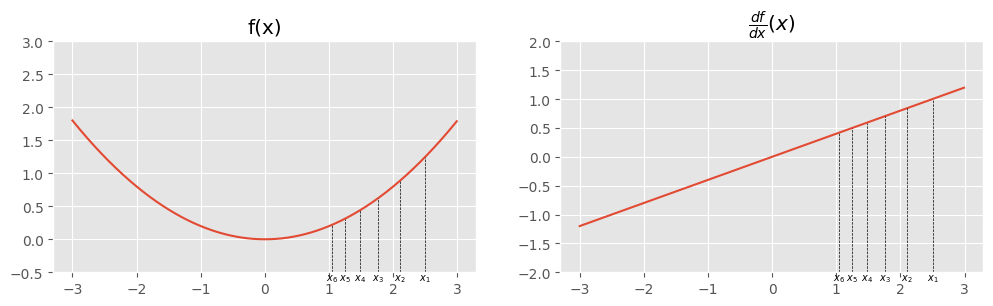

In [11]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt

gd_fig,axes = plt.subplots(ncols=2,figsize=(12,3))

x                   = np.arange(-3,3,0.01)
fx                  = (x**2) / 5
df                  = (2*x) /  5

axes[0].plot(x,fx)
#axes[0].axis('equal')
axes[0].set_ylim((-0.5,3))
axes[0].set_title('f(x)')
axes[1].plot(x,df)
#axes[1].axis('equal')
axes[1].set_ylim((-2,2))
axes[1].set_title(r'$\frac{d f}{dx}(x)$')



xt = 2.5
fpoints = [(xt,0.2*xt**2)]
dfpoints= [(xt,0.4*xt)]
for _ in range(5):
	xt = xt - 0.4 * 2/5 * xt
	fpoints.append((xt, 0.2 * xt**2))	
	dfpoints.append((xt, 0.4 * xt))	

for i,(x,y) in enumerate(fpoints):
	axes[0].text(x,-0.5,f'$x_{i+1}$',verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[0].plot([x,x],[-0.5,y],'--',color="black",linewidth=0.5)


for i,(x,y) in enumerate(dfpoints):
	axes[1].text(x,-2.,f'$x_{i+1}$',verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[1].plot([x,x],[-2.,y],'--',color="black",linewidth=0.5)


glue("gd_fig",gd_fig,display=False)

```{admonition} Gradient descent illustrated

The observation of the gradient descent method on a simple function further illustrates its weaknesses.
Here we illustrates the first few iterates of a gradient descent both on the function $f(x) = \frac{1}{5} x^2$
and on its derivative $\frac{df}{dx} =  \frac{2}{5} x$, starting from a random iterate $x_1 = 2.5$.

{glue:any}`gd_fig`

As can be seen the gradient descent is blind to the actual shape of the derivative function itself.
The stepsize is dependent of an arbitrary constant $\alpha$ and on the pointwise value of the derivative.
The secant and newton method substantially improve this behavior by seeking to define an adaptative $\alpha$ taking into account the shape of the derivative function.
```


```{admonition} Line equations

At several times  in this chapter it may be helpful to have in mind some line and plane equations.
The *univariate* line equation has the form

$$
f(x) =  a x + b
$$

where $a$ is the **slope** coefficient and $b$ the **intercept** or the height $f(0)$ of the point $(0,f(0))$ where the line crosses the $y$-axis.
When we know the slope and a point $(x_t,f(x_t))$ on the line where $x_t \not = 0$ then the equation takes the form:

$$
f(x) = a (x-x_t) + f(x_t)
$$

and observe that this generalized version reduces to the previous equation when $x_t = 0$.
``


**The secant method** is a root finding method that given two iterates $x_{t-1}$ and $x_t$ generates the next iterate $x_{t+1}$ by intersecting the secant line joining  $(x_{t-1},\frac{df}{dx}(x_{t-1}))$ and $(x_t, \frac{df}{dx}(x_t))$ with the $x$ axis.
In other words the secant method approximates the derivative of the derivative function $\frac{df}{dx}$ with a finite difference approximation.

+++

```{prf:algorithm} Secant method
:label: sec-algo

**while** $ | x_{t+1} - x_t | > \epsilon $ **do**
- $\alpha \gets \frac{x_t-x_{t-1}}{\frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) }$
- $x_{t+1} \gets x_t - \alpha\frac{df}{dx}(x_t)$

```


The secant method is given as {prf:ref}`sec-algo`. To understand the algorithm, we first express the equation of the secant going through $(x_{t-1},\frac{df}{dx}(x_{t-1}))$ and $(x_t, \frac{df}{dx}(x_t))$:

$$
y  = \frac{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) } {x_t-x_{t-1}} (x-x_{t}) + \frac{df}{dx}(x_{t})
$$

Thus any point on the secant has coordinates $(x,y)$ subject to the constraint given by the equation.
To select the next iterate $x_{t+1}$, we seek the intersection of the secant with the $x$ axis, that is the  value of $x$ for which $y = 0$:

$$
\begin{align}
\frac{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) } {x_t-x_{t-1}} (x-x_{t}) + \frac{df}{dx}(x_{t}) &= 0\\
\frac{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) } {x_t-x_{t-1}} (x-x_{t}) &=  - \frac{df}{dx}(x_{t}) \\
x-x_{t} &=  - \frac{x_t-x_{t-1}}{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) }  \frac{df}{dx}(x_{t}) \\
x &= x_{t} - \frac{x_t-x_{t-1}}{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) }  \frac{df}{dx}(x_{t}) 
\end{align}
$$

that we rewrite :

$$
\begin{align}
\alpha &= \frac{x_t-x_{t-1}}{ \frac{df}{dx}(x_t)- \frac{df}{dx}(x_{t-1}) } \\
x_{t+1} &= x_{t} - \alpha \frac{df}{dx}(x_{t}) 
\end{align}
$$

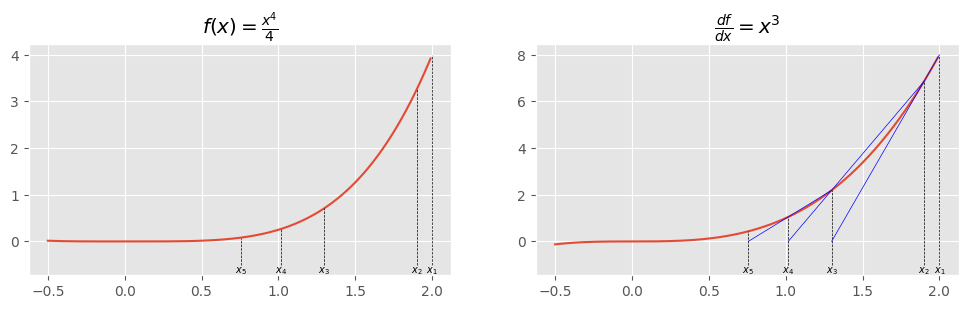

In [12]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt

sec_fig,axes = plt.subplots(ncols=2, figsize=(12,3))

x   = np.arange(-0.5,2,0.01)
fx  = 0.25 * x**4
dfx = x**3

axes[0].plot(x,fx)
axes[1].plot(x,dfx)
axes[0].set_title(r'$f(x)=\frac{x^4}{4}$')
axes[1].set_title(r'$\frac{df}{dx}=x^3$')

xprev = 2
x     = 1.9
fiter = [(xprev,0.25 * xprev**4),(x,0.25 * x**4)]
dfiter= [(xprev,xprev**3),(x,x**3)]
for _ in range(3):
	alpha = (x - xprev) / (x**3-xprev**3)
	xprev =  x
	x     =  x - alpha * x**3
	fiter.append((x,0.25*x**4))
	dfiter.append((x,x**3))

for i,(x,y) in enumerate(fiter):
	axes[0].text(x,-0.5,f"$x_{i+1}$", verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[0].plot([x,x],[-0.5,0.25*x**4],'--',color="black",linewidth=0.5)


for i,(x,y) in enumerate(dfiter):

	axes[1].text(x,-1.,f"$x_{i+1}$", verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[1].plot([x,x],[-1.,x**3],'--',color="black",linewidth=0.5)
	if i > 1:
		ppx,ppy = dfiter[i-2]
		axes[1].plot([x,ppx],[0,ppy],color="blue",linewidth=0.5)


glue("sec_fig",sec_fig,display=False)

```{admonition} The secant method illustrated

Here is an example of the first few iterations of the secant method on the function $f(x) = \frac{x^4}{4}$
with initialisation $x_1=2$ and $x_2=1.9$. As can be seen, for optimization purposes the secants are computed on the function's derivative 
and at each time step capture the approximative shape of the derivative with the secant in order to guess the next iterate.

{glue:any}`sec_fig`

```

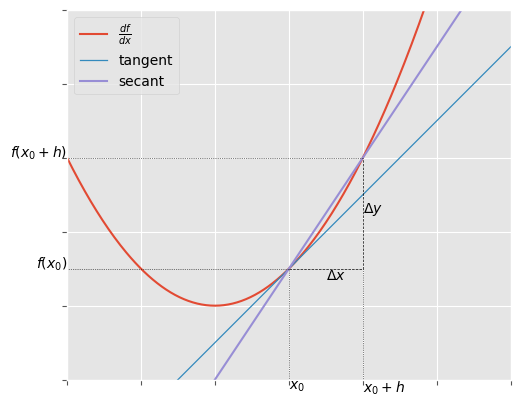

In [13]:
from myst_nb import glue

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
fig,axes = plt.subplots()
x    = np.arange(-2,2.5,0.01)
fx   = (x+1)**2
secx = (1-0.25)/(0+0.5) * (x+0.5)+0.25


line = (x+0.5)+0.25
axes.plot(x,fx,label=r"$\frac{df}{dx}$")
axes.plot(x,line,linewidth=0.9,label='tangent')
axes.plot(x,secx,label="secant")
axes.plot([-0.5,-0.5],[-1,0.25],":",color="black",linewidth = 0.5)
axes.plot([-2,-0.5],[0.25,0.25],":",color="black",linewidth = 0.5)
axes.plot([-0.5,-0.0],[0.25,0.25],"--",color="black",linewidth = 0.5)
axes.plot([0,0.0],[0.25,1.],"--",color="black",linewidth = 0.5)
axes.legend()

#with matplotlib.rc_context({'path.sketch': (2, 5, 1)}):
#    axes.plot([0,0],[0.75,1.0], color = 'black', linewidth=0.5)
axes.plot([-2,0.0],[1.0,1.0],":",color="black",linewidth = 0.5)
axes.plot([0.0,0.0],[-0.5,0.25],":",color="black",linewidth = 0.5)

axes.text(-0.5,-0.5,"$x_0$",verticalalignment="top")
axes.text(-0.0,-0.5,"$x_0+h$",verticalalignment="top")
axes.text(-2,0.25,"$f(x_0)$",horizontalalignment="right")
axes.text(-2,1.0,"$f(x_0+h)$",horizontalalignment="right")

axes.text(-0.25,0.25,"$\Delta x$",verticalalignment="top")
axes.text(0.0,0.625,"$\Delta y$",horizontalalignment="left")


axes.set_ylim((-0.5,2))
axes.set_xlim((-2,1))
axes.set_xticks(axes.get_xticks(),labels="")
axes.set_yticks(axes.get_yticks(),labels="")
axes.grid(True)

axes.set_aspect('equal')

glue("fd",fig,display=False)

```{admonition} The finite difference approximation
:class: tip

The secant method relies on the finite difference approximation of the second order derivative.
Remember that a derivative is defined as:

$$
\frac{d y}{d x}(x_0) = \lim_{h\rightarrow 0} \frac{f(x_0 + h )-f(x_0)}{(x_0+h)-x_0}
$$

when $h$ is infinitesimal the derivative is the exact slope coefficient of the tangent at $(x_0,f(x_0))$. 
If $h$ is not anymore infinitesimal (is finite) and we use a slope coefficient with finite differences:

$$
\frac{\Delta y}{\Delta x}(x_0) = \frac{f(x_0 + h )-f(x_0)}{(x_0+h)-x_0}
$$

then the line connecting $(x_0,f(x_0))$ and $(x_0+h,f(x_0+h))$ is a secant to the function. As can be seen on the illustration below
the slope of the secant is an approximation of the slope of the tangent

{glue:any}`fd`

```

**Newton's method**  is a root finding method that given an iterate $x_t$ generates the next iterate $x_{t+1}$ by intersecting the tangent line of the derivative at $(x_t, \frac{df}{dx}(x_t))$ with the $x$ axis.
In a context of optimization, the Newton method thus uses the second order derivative as slope of the tangent line.

```{prf:algorithm} Newton method
:label: newton-algo

**while** $ | x_{t+1} - x_t | > \epsilon $ **do**
- $\alpha \gets \frac{1}{\frac{d^2f}{dx^2}}$
- $x_{t+1} \gets x_t - \alpha\frac{df}{dx}(x_t)$

```

The Newton method is given as {prf:ref}`newton-algo`.  The algorithm is the result of a development similar to the secant method: we start by expressing the equation of the tangent
at $(x_t, \frac{df}{dx}(x_t))$

$$
y = \frac{d^2 f}{dx^2}(x_t) (x - x_t) + \frac{df}{dx}(x_t) 
$$
 
The coordinates of the points of the tangent are $(x,y)$ subject to the constraint given by the equation. To get the value of $x$ when intersecting the $x-$axis we solve:

$$
\begin{align}
 \frac{d^2 f}{dx^2}(x_t) (x - x_t) + \frac{df}{dx}(x_t)  &= 0\\
x - x_t  &= - \frac{1}{ \frac{d^2 f}{dx^2}(x_t) }  \frac{df}{dx}(x_t)\\
x &= x_t - \frac{1}{ \frac{d^2 f}{dx^2}(x_t) }  \frac{df}{dx}(x_t)
\end{align}
$$

and finally we rewrite to :

$$
\begin{align}
\alpha &= \frac{1}{ \frac{d^2 f}{dx^2}(x_t) } \\
x_{t+1} &= x_t -\alpha  \frac{df}{dx}(x_t)
\end{align}
$$

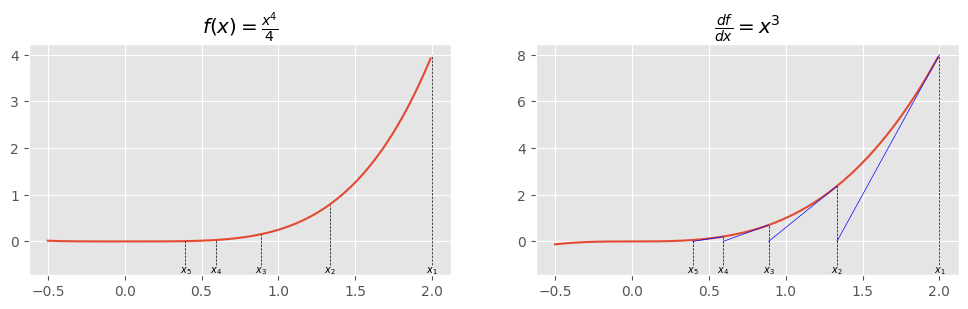

In [14]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt

newton_fig,axes = plt.subplots(ncols=2, figsize=(12,3))

x   = np.arange(-0.5,2,0.01)
fx  = 0.25 * x**4
dfx = x**3

axes[0].plot(x,fx)
axes[1].plot(x,dfx)
axes[0].set_title(r'$f(x)=\frac{x^4}{4}$')
axes[1].set_title(r'$\frac{df}{dx}=x^3$')

x = 2
fiter = [(x,0.25 * x**4)]
dfiter= [(x,x**3)]
for _ in range(4):
	alpha = 1/(3*x**2)
	x     =  x - alpha * x**3
	fiter.append((x,0.25*x**4))
	dfiter.append((x,x**3))


for i,(x,y) in enumerate(fiter):
	axes[0].text(x,-0.5,f"$x_{i+1}$", verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[0].plot([x,x],[-0.5,0.25*x**4],'--',color="black",linewidth=0.5)

for i,(x,y) in enumerate(dfiter):
	axes[1].text(x,-1.,f"$x_{i+1}$", verticalalignment='top',horizontalalignment="center",fontsize=7)
	axes[1].plot([x,x],[-1.,x**3],'--',color="black",linewidth=0.5)
	
	if i > 0:
		px,py = dfiter[i-1]
		axes[1].plot([x,px],[0,py],color="blue",linewidth=0.5)

glue("newton_fig",newton_fig,display=False)

```{admonition} Newton method illustrated

Here is an example of the first few iterations of the newton method on the function $f(x) = \frac{x^4}{4}$, with derivatives
$\frac{df}{dx} = x^3$, $\frac{d^2f}{dx^2} = 3x^2$  and initialisation $x_1 = 2$.

{glue:any}`newton_fig`

```

```{warning}
Although Newton's method may look the best of the three methods, the method suffers when used to optimize massively multivariate convex functions
and is generally terrible for non convex functions. For these reasons in context of massively multivariate problems or deep learning problems,
optimization algorithms continue to use gradient descent or quasi-newton methods (guessing an approximate $\alpha$ like the secant method) as long as the precision of the solution is not critical, which is the case for most modern machine learning problems in natural language processing.
```

```{admonition} How to implement it in python ?
:class: tip

Optimization of univariate functions is essentially an in class toy exercise from the natural language processing perspective.
Most univariate problems described in this course can be solved with `sympy` with the functions `diff` and `nonlinsolve` respectively 
dedicated to compute the derivatives of functions and then to find the roots of the derivative. Here is an example:
```

In [15]:
from sympy import symbols,diff,nonlinsolve

x    = symbols('x')
f    = 1/4 * x**4
fp   = diff(f,x)    #first derivative with respect to x
fs   = diff(fp,x)   #second derivative with respect to x
root = nonlinsolve([fp],[x],[10]) #optimizes for variable 'x' with x_1 = 10
print(f'f(x) = {f}, first derivative = {fp}, second derivative = {fs}')
print('minimum found :',root)

f(x) = 0.25*x**4, first derivative = 1.0*x**3, second derivative = 3.0*x**2
minimum found : {(0,)}


## Convex optimization of multivariate functions

In this section we consider the optimization problem of multivariate functions of the form $f: \mathbb{R}^n \mapsto \mathbb{R}$ which is the usual case of interest in machine learning.
Most notions relevant for the univariate case generalize well to the multivariate case, yet the technicality increases and solving massively multivariate problems require more specialized numerical libraries.

We first review how convexity and the notion of derivative extend to the multivariate case before introducing the generalization of the gradient descent and the multivariate newton method.

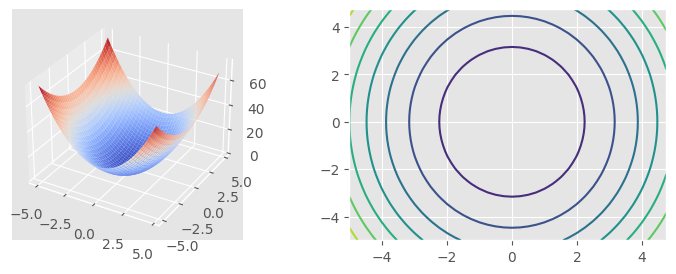

In [16]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(9,3))


# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = 2*X**2 + Y**2


# Plot the surface.
ax3d    = fig.add_subplot(121,projection='3d')
surf    = ax3d.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=True)

ax2d    = fig.add_subplot(122)
contour = ax2d.contour(X,Y,Z) 

glue("3dfunc",fig,display=False)

```{admonition} Example
Here is a graphical illustration, as 3d plot and as contour plot, of an example function  $f:\mathbb{R}^2 \mapsto \mathbb{R}$.
It is the bivariate function $f(\mathbf{x}) = f(x_1,x_2) = 2x_1^2 +  x_2^2$ whose two variables $x_1,x_2$ are part of the vector $\mathbf{x}$

{glue:any}`3dfunc` 

```

### Convexity

The definition of convexity is essentially a direct extension of the univariate case.
Let the function $f: \mathbb{R}^n \mapsto \mathbb{R}$ whose domain is a convex set, then $f$ is convex iff:

$$
f(t \mathbf{x}_1 + (1-t) \mathbf{x}_2) \leq t f(\mathbf{x}_1) + (1-t) f(\mathbf{x}_2) \qquad t \in [0,1] , \mathbf{x}_1\in\mathbb{R}^n, \mathbf{x}_2\in\mathbb{R}^n 
$$

Informally for any two chosen points $(\mathbf{x}_1,f(\mathbf{x}_1))$ and  $(\mathbf{x}_2,f(\mathbf{x}_2))$, one should be able to draw a string above or on the "function bowl" without crossing its surface.
As for the univariate case, strict convexity is defined as:

$$
f(t \mathbf{x}_1 + (1-t) \mathbf{x}_2) < t f(\mathbf{x}_1) + (1-t) f(\mathbf{x}_2) \qquad t \in [0,1] , \mathbf{x}_1\in\mathbb{R}^n, \mathbf{x}_2\in\mathbb{R}^n 
$$

and it ensures that the function has a unique minimum.

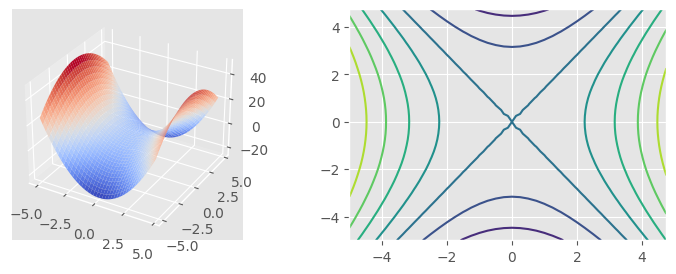

In [17]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(9,3))


# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = 2*X**2 - Y**2


# Plot the surface.
ax3d    = fig.add_subplot(121,projection='3d')
surf    = ax3d.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=True)

ax2d    = fig.add_subplot(122)
contour = ax2d.contour(X,Y,Z) 

glue("saddle",fig,display=False)

```{admonition} Example
As our first example illustrated a convex bivariate function, 
here is a graphical illustration, as 3d plot and as contour plot, of a non convex function,
$f(\mathbf{x}) = f(x_1,x_2) = 2x_1^2 -  x_2^2$.

{glue:any}`saddle` 

```

### Partial derivatives and the gradient

The counterpart of the derivative for the multivariate case is called the gradient. 
The gradient of a function $f$ is a vector $\nabla f$ of partial derivatives. 
For strictly convex functions, a zero gradient at $\mathbf{x}$, that is $\nabla f(\mathbf{x}) = \mathbf{0}$
indicates that $\mathbf{x}$ is minimum of the function.

**Partial derivatives** 
For a multivariate function $f(x_1,\ldots x_n)$ the partial derivative with respect to a variable $x_i$ 
is the derivative of the partial function where all $x_j\quad (i\not = j)$ are set to constants 
except the variable $x_i$. Thus the partial derivative with respect to $x_i$ captures the variation of the function along one of its coordinates.
We write the partial derivative of $f$ with respect to $x_i$ as:

$$
\frac{\partial f}{\partial x_i}(\mathbf{x}) = \lim_{h\rightarrow 0} \frac{f(x_1,\ldots, x_i + h, \ldots x_n )-f(x_1,\ldots, x_i, \ldots x_n )} { h}
$$

alternatively we use the compact vector notation:

$$
\frac{\partial f}{\partial x_i}(\mathbf{x}) = \lim_{h\rightarrow 0} \frac{f(\mathbf{x} + h \mathbf{e}_i)  )-f(\mathbf{x} )} { h}
$$

with $\mathbf{e}_i$ is a one hot vector at $i$.

**Gradient** The gradient of the multivariate function $f( x_1,\ldots x_n )$ at $\mathbf{x}$ is the vector:

$$
\nabla f(\mathbf{x}) = 
\begin{bmatrix}
\frac{\partial f}{\partial x_1} (\mathbf{x})\\
\vdots\\
\frac{\partial f}{\partial x_n} (\mathbf{x})
\end{bmatrix}
$$

```{admonition} Relevance of the gradient for optimization

For optimization purposes the gradient is an indicator on where to search the minimum of a convex function, in particular:

- when the gradient is null, $\nabla f(\mathbf{x}) = \mathbf{0}$, $\mathbf{x}$ is the minimum of a strictly convex function
- otherwise the gradient is a vector pointing towards the direction of the steepest ascent of the function

Recall that a partial derivative quantifies the evolution of the function along a direction where a *single coordinate* changes. 
From the gradient we get the difference for one coordinate with: 

$$
\frac{\partial f}{\partial x_i} = \nabla f(\mathbf{x})^\top \mathbf{e}_i
$$

where $\mathbf{e}_i$ is a one hot vector. 


Now we could quantify the evolution of the function along a chosen unit vector $\mathbf{u}$
( $ || \mathbf{u} || = 1 $) not necessarily constrained to be one hot. This is a **directional derivative** where the evolution along 
the direction $\mathbf{u}$ is given by:

$$
\begin{align}
D_\mathbf{u}(\mathbf{x}) &= \nabla f(\mathbf{x})^\top \mathbf{u} \\
&= \frac{\partial f}{\partial x_1}(\mathbf{x}) u_1 + \ldots + \frac{\partial f}{\partial x_n}(\mathbf{x}) u_n
\end{align}
$$

Now we ask the question: among all these possible $\mathbf{u}$ vectors which one creates the biggest increase ? 
We thus want to solve :

$$
\hat{\mathbf{u}} = \mathop{\text{argmax}}_{\mathbf{u} : ||\mathbf{u} || = 1}  \nabla f(\mathbf{x})^\top \mathbf{u}
$$

Recalling that $\cos\theta = \frac{\nabla f(\mathbf{x})^\top \mathbf{u}}{||\nabla f(\mathbf{x})|| || \mathbf{u} ||}$, we can conclude that
the maximum value is obtained when $\cos\theta = 1$ that is when $ \nabla f(\mathbf{x}) $ and $ \mathbf{u} $ 
are collinear and head in the same direction. In other words the direction of steepest increase for the function is given by the gradient vector.
```

**Hessian** For the Newton method it is natural to compute second order
derivatives. In the monovariate case it is straightforward, given the
first order derivative $\frac{d f}{d x}$ one can compute the second order derivative function by 
deriving again for the same variable and get the unique second order derivative function $\frac{d^2 f}{d x^2}$.

Now consider the multivariate function $f(x_1\ldots x_n)$. This function as $n$ first order partial derivatives making up the gradient vector. And each of these
$n$ function can be derived again with respect to each  of the $n$ variables. Thus deriving a function first with respect to $x_i$ yields the first order partial derivative
$\frac{\partial f}{\partial x_i}$ and again with respect to $x_j$ yields the second order derivative $\frac{\partial^2 f}{\partial x_ix_j}$. Overall the **hessian** is a square symmetric matrix of second order derivatives.

$$
\mathbf{H}_f = 
\begin{bmatrix}
\frac{\partial^2 f }{\partial x^2_1}  & \cdots & \frac{\partial^2 f }{\partial x_1 \partial x_n}\\
\vdots  & \ddots & \vdots\\
\frac{\partial^2 f }{\partial x_n \partial x_1} & \cdots & \frac{\partial^2 f }{\partial x_n^2}
\end{bmatrix}
$$

```{admonition} Example
:class: example

Consider the bivariate function $f(x,y) = x^2 y + 3xy + xy^2$, its gradient vector is the vector:

$$
\nabla f =
\begin{bmatrix}
2xy + 3y + y^2\\
x^2 + 3x + x 2y
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}
\end{bmatrix}
$$

From there we derive the hessian:

$$
\mathbf{H}_f = 
\begin{bmatrix}
2 & 2x+3 + 2y\\ 
2x + 3 + 2y & 2
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial^2 f }{\partial x^2} & \frac{\partial^2 f }{\partial x \partial y}\\
 \frac{\partial^2 f }{\partial y \partial x}& \frac{\partial^2 f }{\partial y^2}
\end{bmatrix}
$$



```

### Numerical root finding methods

The multivariate numerical optimization problem amounts to solve the minimization problem:

$$
\mathbf{x} = \mathop{\text{argmin}}_{\mathbf{x}\in\mathbb{R}^n} f(\mathbf{x})
$$

in case $f$ is strictly convex, the solution to the problem exists and is unique. Most of the time multivariate optimization problems are not solved analytically 
since they often involve solving complicated systems of non linear equations.

Rather numerical optimization methods are the standard way to go. We describe here generalizations of the gradient descent and the newton method to the multivariate case.
Both methods generate sequence of iterates starting from an initial random guess: $\mathbf{x}_1 \ldots \mathbf{x}_n$. This time the iterates are vectors $\mathbf{x}_i \in \mathbb{R}^n$.
The iteration ends up when the last iterate is sufficiently close to the minimum.

The **multivariate gradient descent** mirrors the univariate case. Here we take advantage of the property that the gradient vector points towards the steepest increase direction.
To achieve minimization, the update function of the algorithm amounts to move in the opposite direction of the gradient. Again $\alpha$ is a positive real controlling the update step size.

```{prf:algorithm} multivariate gradient descent
:label: gd-algo-mv

**while** $ || \nabla f(\mathbf{x}_t) ||  > \epsilon $ **do**
- $\mathbf{x}_{t+1} \gets \mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t)$
```

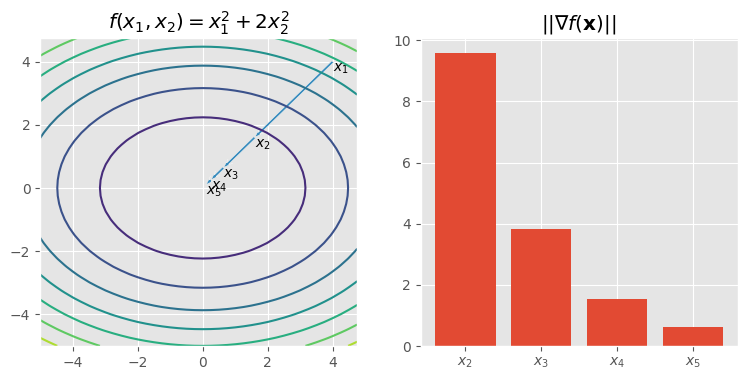

In [18]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import norm

fig = plt.figure(figsize=(9,4))


# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

Z = X**2 + 2*Y**2


# Plot the surface.
ax2d    = fig.add_subplot(121)
contour = ax2d.contour(X,Y,Z) 

iterates = [(4,4)]
inorms   = []

def grad_fn(x):
	return x @ np.array([2,4])
	

x = iterates[-1]
alpha = 0.1
for _ in range(4):
	x = x - alpha*grad_fn(x)
	iterates.append(x)
	inorms.append(norm(grad_fn(x)))

for idx,x in enumerate(iterates):
    ax2d.text(x[0],x[1],f'$x_{idx+1}$',verticalalignment='top',horizontalalignment='left')
    if idx > 0:
      px = iterates[idx-1]
      dx = x-px
      ax2d.arrow(px[0],px[1],dx[0],dx[1],width=0.075,overhang=0.4,length_includes_head=True,head_width=0.2)
	  
ax2d.set_title(r'$f(x_1,x_2) = x_1^2+2x_2^2$')
ax2d    = fig.add_subplot(122)
ax2d.set_title(r'$|| \nabla f(\mathbf{x}) ||$')
b       = ax2d.bar(range(len(inorms)),height=inorms,tick_label=[f'$x_{i+2}$' for i in range(len(inorms))])

glue("mv_gd",fig,display=False)

```{admonition} Example
:class: example

We illustrate the first few steps of the gradient descent algorithm on the convex function $ f(x_1,x_2) = 3x_1^2+ x^2_2 - x_1x_2 - 3 x_2 $ given an initial iterate
at $\mathbf{x}_1 = (9,9)$. We provide the successive iterates on the contour plot of the function as well as successive values of the gradient 
norm computed at each update.

{glue:any}`mv_gd`

the gradient of this function is the following:

$$
\nabla f(\mathbf{x}) =
\begin{bmatrix}
6 x_1 - x_2 \\
- x_1 + 2 x_2 - 3
\end{bmatrix}
$$
```

In [19]:
#Example implementation of the multivariate gradient descent in numpy
# for the function f(x_1,x_2) = 3x_1^2+ x^2_2 - x_1x_2 - 3 x_2 
# and alpha = 0.2

import numpy as np
from numpy.linalg import norm

def grad(x):
  return np.array([[6,-1],[-1,2]]) @ x + np.array([0,-3])

def grad_descent(x0, grad,alpha=0.2,epsilon=0.05):
	x  = x0
	dx = grad(x)
	while norm(dx) > epsilon:
		x     = x - alpha * dx
		dx = grad(x)
		
		print(x)
	return x

min = grad_descent(np.array([4,4]),grad)
print('minimum found',min)

[0.  3.8]
[0.76 2.88]
[0.424 2.48 ]
[0.4112 2.1728]
[0.35232 1.98592]
[0.32672  1.862016]
[0.3070592 1.7825536]
[0.29509888 1.730944  ]
[0.28716902 1.69758618]
[0.28208343 1.67598551]
[0.27878042 1.66200799]
minimum found [0.27878042 1.66200799]


The **Multivariate Newton method** extends naturally the newton method to the multivariate case. It is provided as {prf:ref}`newton-mv`. 
The key difference with other algorithms described so far is located in the $\alpha$. When optimizing a function $f(x_1\ldots x_n)$, $\alpha$
is now a square matrix of size $n\times n$, the inverse hessian $\mathbf{H}^{-1}_f(\mathbf{x}_t)$. This matrix contains second order derivatives 
and is a counterpart of the second order derivative used in the univariate case. In some sense theres is not a unique learning rate $\alpha$ anymore but rather a matrix
of learning rates some of them related only to some partial functions.

```{prf:algorithm} multivariate Newton
:label: newton-mv

**while** $ || \nabla f(\mathbf{x}_t) ||  > \epsilon $ **do**
- $\alpha \gets \mathbf{H}^{-1}_f(\mathbf{x}_t)$ 
- $\mathbf{x}_{t+1} \gets \mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t)$
```

To see where the newton update comes from, let us remind ourselves that for finding the minimum the method aims to solve a system of linear equations of the form:

$$
\begin{bmatrix}
0\\
\vdots\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x})\\
\vdots\\
\frac{\partial f}{\partial x_n}(\mathbf{x})\\
\end{bmatrix}
$$

Since solving this system of equations is not straightforward, like in the univariate case, we rather approximate each partial derivative function by a linear approximation (a tangent plane to the partial derivative function). 
The set of tangent plane equations for each  partial derivative and some point $(\mathbf{x}_t,\frac{\partial f}{\partial x_i}(\mathbf{x}_t))$ is given by:

$$
\begin{align}
y_1 &= \frac{\partial f}{\partial x_1}(\mathbf{x}_t) + \frac{\partial^2 f}{\partial x_1\partial x_1}(\mathbf{x}_t) (x_{1}-x_{t1})+ \ldots + 
\frac{\partial^2 f}{\partial x_1\partial x_n}(\mathbf{x}_t) (x_n-x_{tn}) \\
y_2 &= \frac{\partial f}{\partial x_2}(\mathbf{x}_t) + \frac{\partial^2 f}{\partial x_2\partial x_1}(\mathbf{x}_t) (x_{1}-x_{t1})+ \ldots + 
\frac{\partial^2 f}{\partial x_2\partial x_n}(\mathbf{x}_t) (x_n-x_{tn}) \\
&\vdots \\ 
y_n &= \frac{\partial f}{\partial x_n}(\mathbf{x}_t) + \frac{\partial^2 f}{\partial x_n\partial x_1}(\mathbf{x}_t) (x_{1}-x_{t1})+ \ldots + 
\frac{\partial^2 f}{\partial x_n\partial x_n}(\mathbf{x}_t) (x_n-x_{tn}) \\
\end{align}
$$

If we simplify the notation with vector matrix notation we get :

$$
\mathbf{y} = \nabla f(\mathbf{x}_t) + \mathbf{H}_f(\mathbf{x}_t) (\mathbf{x} - \mathbf{x}_t)
$$

the Newton step amounts to seek $\mathbf{x}$ for which $\mathbf{y} = \mathbf{0}$, thus we solve:

$$
\begin{align}
\nabla f(\mathbf{x}_t) + \mathbf{H}_f(\mathbf{x}_t) (\mathbf{x} - \mathbf{x}_t) &= \mathbf{0} \\
\mathbf{H}_f(\mathbf{x}_t) (\mathbf{x} - \mathbf{x}_t) &= -\nabla f(\mathbf{x}_t) \\
\mathbf{x} - \mathbf{x}_t &= - \mathbf{H}^{-1}_f(\mathbf{x}_t)   \nabla f(\mathbf{x}_t) \\
\mathbf{x} &=  \mathbf{x}_t - \mathbf{H}^{-1}_f(\mathbf{x}_t)  \nabla f(\mathbf{x}_t) 
\end{align}
$$

that we finally rewrite slightly to get the multivariate Newton update:

$$
\begin{align}
\alpha &= \mathbf{H}^{-1}_f(\mathbf{x}_t) \\
\mathbf{x}_{t+1} &=  \mathbf{x}_t - \alpha \nabla f(\mathbf{x}_t) 
\end{align}
$$



```{admonition} Plane equations
In the *multivariate* case, line equations generalize to the plane equations:

$$
f(\mathbf{x}) =  a_1 x_1 + a_2 x_2 + \ldots + a_n x_n + b
$$

where each $a_i$ is a partial slope  and $b$ the intercept. Again in case we know the slopes and a point $(\mathbf{x}_t,f(\mathbf{x}_t))$
the equation generalizes to :

$$
f(\mathbf{x}) =  a_1 (x_1-x_{t1}) + a_2 (x_2-x_{t2}) + \ldots + a_n (x_n-x_{tn}) + f(\mathbf{x}_t)
$$

which again reduces to the less general equation when $\mathbf{x}_t = \mathbf{0}$. 
Finally observe that this last equation can be expressed with vector operations. Let $\mathbf{a} = (a_1, a_2,\ldots a_n)$ 
be the vector of coefficients and $(\mathbf{x}-\mathbf{x}_t) = (x_1-x_{t1}, x_2-x_{t2},\ldots x_n-x_{tn})$  then we can reformulate as:

$$
f(\mathbf{x}) =  \mathbf{a}^\top (\mathbf{x}-\mathbf{x}_t)+ f(\mathbf{x}_t)
$$
```

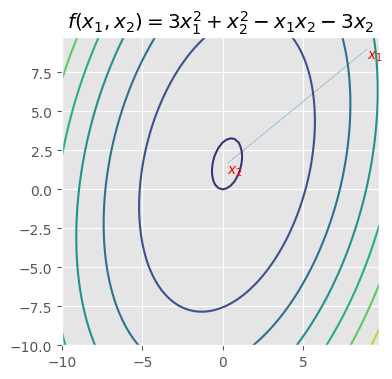

In [20]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import norm,inv

fig = plt.figure(figsize=(9,4))


# Make data.
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)

Z = - X*Y - 3*Y + 3*X**2 + Y**2

# Plot the surface.
ax2d    = fig.add_subplot(121)
contour = ax2d.contour(X,Y,Z)

iterates = [np.array([9,9])]
inorms   = []

def grad_fn(x):
	return np.array([[6,-1],[-1,2]])@x + np.array([0,-3])
	
def hessian_fn(x):
	return np.array([[6,-1],[-1,2]])

x = iterates[-1]
alpha = 0.1
for _ in range(1):
	alpha = inv(hessian_fn(x))
	x = x - alpha @ grad_fn(x)
	iterates.append(x)
	inorms.append(norm(grad_fn(x)))

for idx,x in enumerate(iterates):
    ax2d.text(x[0],x[1],f'$x_{idx+1}$',verticalalignment='top',horizontalalignment='left',color="red")
    if idx > 0:
      px = iterates[idx-1]
      dx = x-px
      ax2d.arrow(px[0],px[1],dx[0],dx[1],width=0.075,overhang=0.4,length_includes_head=True,head_width=0.2)
	  
ax2d.set_title(r'$f(x_1,x_2) =3x_1^2+ x^2_2 - x_1x_2 - 3 x_2$')

glue("mv_newton",fig,display=False)

```{admonition} Example
:class: example


We illustrate the first few steps of the Newton algorithm on the convex function $f(x_1,x_2) = 3x_1^2+ x^2_2 - x_1x_2 - 3 x_2$ given an initial iterate
at $\mathbf{x}_1 = (9,9)$. 
The gradient of this function is:

$$
\nabla f(\mathbf{x}) = 
\begin{bmatrix}
6 x_1 - x_2\\
-x_1 + 2 x_2 - 3
\end{bmatrix}
$$

and the hessian matrix :

$$
\mathbf{H}f(\mathbf{x}) =
\begin{bmatrix}
6 & -1\\
-1 & 2
\end{bmatrix}
$$



We provide the successive iterates on the contour plot of the function. 
As can be seen the Newton method finds the solution in one iteration.

{glue:any}`mv_newton` 

```

In [21]:
#Example implementation of the multivariate Newton in numpy
#for the function f(x_1,x_2) = 3x_1^2+ x^2_2 - x_1x_2 - 3 x_2 

import numpy as np
from numpy.linalg import norm, inv

def grad(x):
  return np.array([[6,-1],[-1,2]]) @ x + np.array([0,-3])

def hessian(x):
  return np.array([[6,-1],[-1,2]])

def newton(x0, grad, hessian, epsilon=0.00001):
	x  = x0
	dx = grad(x)
	while norm(dx) > epsilon:
		alpha = inv(hessian(x))
		x     = x - alpha @ dx
		dx = grad(x)

		print(x)
	return x

min = newton(np.array([9,9]),grad,hessian)
print('minimum found',min)

[0.27272727 1.63636364]
minimum found [0.27272727 1.63636364]


```{warning}
The Newton method is very efficient for many traditional convex optimization problems. 
The multivariate method has a weakness in terms of computational complexity: building a square hessian matrix is quadratic, ${\cal O}(n^2)$,
and matrix inversion is an algorithm with cubic time complexity in ${\cal O}(n^3)$. In modern machine learning
we often use loss functions where the number $n$ of variables is high and where the computation of the inverse hessian matrix becomes 
a bottleneck that may cause the newton method to become unusable. For this reason there is a large family of algorithms that try to approximate an $\alpha$ 
without computing the true hessian matrix. This is the family of quasi-newton algorithms that is mostly used in modern machine learning. The secant method we described for the univariate case
is an example of such a method: it approximates a second order derivative without ever computing it.
```

## Non convex optimization

Most classical statistical models are convex (and in fact almost linear). Linear regression and logistic regression, the perceptron algorithm (although not differentiable everywhere)
and one gets  a unique global minimum whatever the initial guess $\mathbf{x}_0$. Current deep learning models are generally not convex.

When the problem is not convex anymore (but still assume a continuous function), there is no more guarantee that 

- the function has a unique minimum, there may be several local minima (or even none). Thus the initial guess $\mathbf{x}_0$ matters. 
Different choices of the initial guess $\mathbf{x}_0$ may lead to different solutions
- when the gradient is zero, the critical point is a minimum: instead it may be a maximum or a saddle point.

In machine learning, most of the time, non convex optimization problems are problems that are not radically different from convex problems.
The functions are continuous but not necessarily differentiable and they have local or global minima.

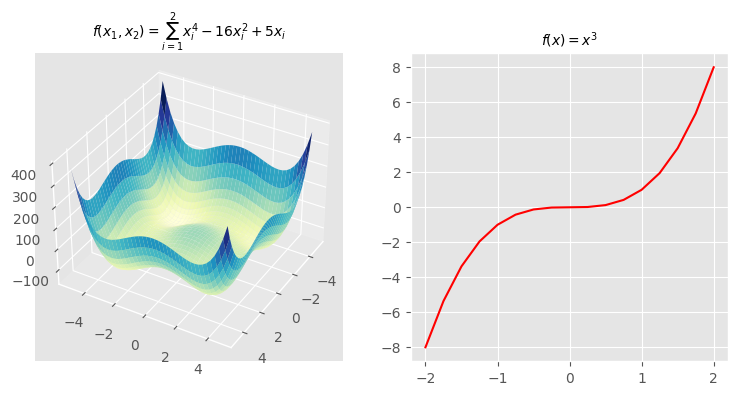

In [22]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import norm,inv

fig = plt.figure(figsize=(9,4))


# Make data.
X = np.arange(-5, 5 , 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)

#http://infinity77.net/go_2021/scipy_test_functions_nd_S.html#go_benchmark.Shekel10
#StyblinskiTang
Z = X**4 - 16*X**2 + 5 * X +  Y**4 - 16*Y**2 + 5 * Y

# Plot the surface.
ax3d    = fig.add_subplot(121,projection = '3d')
contour = ax3d.plot_surface(X,Y,Z,cmap="YlGnBu")
ax3d.view_init(35, 30)
title = ax3d.set_title(r"$f(x_1,x_2) = \sum_{i=1}^2 x_i^4 - 16x_i^2 + 5 x_i$",fontsize=10)


ax2d    = fig.add_subplot(122)
X = np.arange(-2, 2.1 , 0.25)
Y = X**3
ax2d.plot(X,Y,color='red')
title = ax2d.set_title(r"$f(x) = x^3$",fontsize=10)

glue("nonconvex",fig,display=False)

```{admonition} Example
:class: example

On the left, an example of a non convex function with several local minima. 
On the right, an example of non convex function $f(x)=x^3$ where the derivative is 0 at a point $(0,0)$ that is not an extremum.
Instead the minimum of the function is located on a point where the derivative is non null at the limit of the interval.

{glue:any}`nonconvex`


```

Non convex problems may cause difficulties to methods that are otherwise well defined for convex problems. For instance the Newton method may perform too agressive updates
and diverge. In practice, gradient descent methods with some improvements are widely used when optimizing such non convex functions.

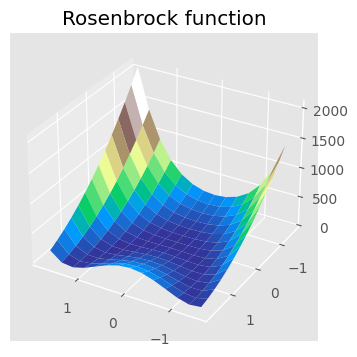

In [23]:
from myst_nb import glue

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from numpy.linalg import norm,inv

fig = plt.figure(figsize=(9,4))


# Make data.
X = np.arange(-1.5, 2 , 0.25)
Y = np.arange(-1.5, 2, 0.25)
X, Y = np.meshgrid(X, Y)

Z = (1-X)**2 + 100 * (Y-X**2)**2

# Plot the surface.
ax3d    = fig.add_subplot(111,projection = '3d')
surf    = ax3d.plot_surface(X,Y,Z,cmap="terrain")#YlGnBu
title   = ax3d.set_title("Rosenbrock function")
ax3d.invert_xaxis()
ax3d.invert_yaxis()


glue('rosen',fig,display=False)

```{admonition} Example
:class: example

Here is an example of a non convex optimisation problem with the Rosenbrock function : $f(x_1,x_2) = (1-x_1)^2 + 100 (x_2-x_1^2)^2$ 
whose unique minimum is $(1,1)$

{glue:any}`rosen`

The gradient of this function is 

$$\nabla f = 
\begin{bmatrix}
 2x_1 - 2 - 400 x_1 (x_2 -x_1^2) \\
 200 (x_2 -  x_1^2)
\end{bmatrix}
$$

and the hessian:

$$
\mathbf{H}_f =
\begin{bmatrix}
2 (600x_1^2 - 200x_2 + 1) & -400 x_1\\
-400 x_1 & 200
\end{bmatrix}
$$

```

In [24]:
def grad(x):
	x1,x2 = x[0],x[1]
	return np.array([2*x1 - 2 - 400 * x1 *(x2 - x1**2), 200*(x2-x1**2)])

def hessian(x):
	x1,x2 = x[0],x[1]
	return np.array([[2*(600*x1**2 - 200*x2 + 1),  -400* x1],[ -400 * x1, 200]])
	

minx = newton(np.array([2,-2]),grad,hessian)
print('minimum found',minx)

[1.99916736 3.99666944]
[1.00013852 0.00221845]
[1.00013783 1.00027568]
[1.         0.99999998]
minimum found [1.         0.99999998]
